**Group Number:** 05

**Group Members:**
- M Hazim R. Prajoda (13523009)
- Orvin Andika Ikhsan A (13523017)
- Fajar Kurniawan (13523027)
- Darrel Adinarya Sunanda (13523061)
- Reza Ahmad Syarif (13523119)

## 0. Data Import and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report
)
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import from-scratch implementations
from src.dtl import C45Classifier, ID3Classifier, CARTClassifier
from src.logistic_regression import LogisticRegressionScratch
from src.svm import SVMOneVsAll, SVMOneVsOne, SVMDAG
from feature_engineering import engineer_all_features

print("✓ Imports successful")

✓ Imports successful


In [2]:
# Load raw data
train_df_raw = pd.read_csv('data/train.csv')
test_df_raw = pd.read_csv('data/test.csv')

print("Raw Training Data:")
print(f"  Shape: {train_df_raw.shape}")
print(f"  Features: {train_df_raw.shape[1] - 1}")
print(f"\nData types:\n{train_df_raw.dtypes}")
print(f"\nTarget Distribution:")
print(train_df_raw['Target'].value_counts())
print(f"\nTarget Proportions:")
print(train_df_raw['Target'].value_counts(normalize=True))

# Display first few rows
train_df_raw.head()

Raw Training Data:
  Shape: (3096, 38)
  Features: 37

Data types:
Student_ID                                          int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debto

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3743,1,17,1,9670,1,1,118.0,1,19,...,0,6,6,6,14.000000,0,12.4,0.5,1.79,Graduate
1,3540,1,1,1,9070,1,1,139.0,1,1,...,0,6,7,6,12.166667,1,16.2,0.3,-0.92,Graduate
2,1118,1,1,1,9500,1,1,138.0,1,38,...,0,8,8,7,13.571429,0,13.9,-0.3,0.79,Graduate
3,791,1,17,1,9773,1,1,138.0,1,1,...,0,6,6,6,13.833333,0,11.1,0.6,2.02,Graduate
4,4381,1,7,1,9500,1,2,140.0,1,38,...,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout


In [3]:
# Data summary statistics
print("Data Summary:")
print(train_df_raw.describe())

# Check for missing values
print("\nMissing Values:")
missing = train_df_raw.isnull().sum()
if missing.sum() == 0:
    print("  No missing values found")
else:
    print(missing[missing > 0])

Data Summary:
        Student_ID  Marital status  Application mode  Application order  \
count  3096.000000     3096.000000       3096.000000        3096.000000   
mean   2201.759690        1.166021         18.372416           1.717700   
std    1275.008676        0.573701         17.456612           1.292362   
min       1.000000        1.000000          1.000000           0.000000   
25%    1102.750000        1.000000          1.000000           1.000000   
50%    2212.000000        1.000000         17.000000           1.000000   
75%    3303.750000        1.000000         39.000000           2.000000   
max    4424.000000        6.000000         57.000000           9.000000   

            Course  Daytime/evening attendance\t  Previous qualification  \
count  3096.000000                    3096.00000             3096.000000   
mean   8832.330749                       0.89438                4.672804   
std    2116.515003                       0.30740               10.387415   
min   

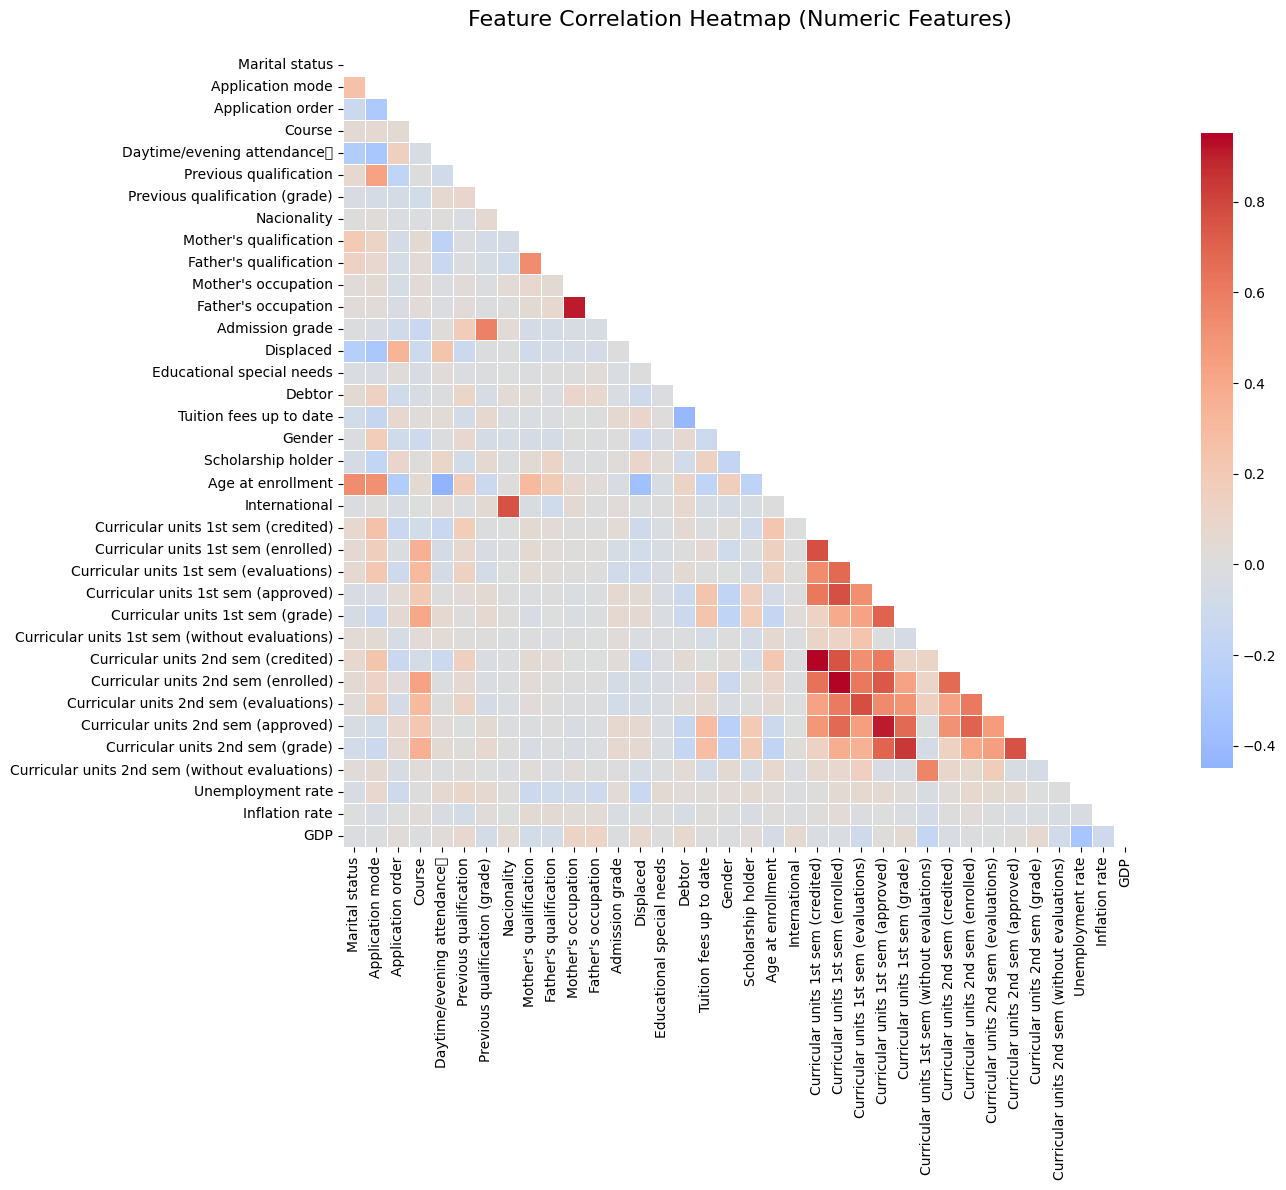


=== Highly Correlated Features (|correlation| > 0.7) ===


,Feature 1,Feature 2,Correlation
3,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.951310
6,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.945653
10,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904150
1,Mother's occupation,Father's occupation,0.902915
11,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.838009
7,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.775330
4,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.770317
2,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.768016
13,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.764819
0,Nacionality,International,0.761875


In [4]:
# Feature Correlation Heatmap
# Select only numeric columns for correlation analysis
numeric_cols = train_df_raw.select_dtypes(include=[np.number]).columns.tolist()

# Remove id column if exists
if 'Student_ID' in numeric_cols:
    numeric_cols.remove('Student_ID')

# Calculate correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = train_df_raw[numeric_cols].corr()

# Create heatmap with annotations for high correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap (Numeric Features)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Show highly correlated features (|correlation| > 0.7)
print("\n=== Highly Correlated Features (|correlation| > 0.7) ===")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', ascending=False, key=abs)
    display(high_corr_df)
else:
    print("No highly correlated feature pairs found.")

## 1. Feature Engineering

Created 36 engineered features across 5 categories:

1. **Academic Features (12)**: Pass rates, grade trends, academic risk
2. **Economic Features (4)**: Financial burden, economic vulnerability
3. **Sociodemographic Features (5)**: Parent education, age patterns
4. **Interaction Features (7)**: Cross-category relationships (e.g., academic × economic stress)
5. **Enrolled-Specific Features (8)**: Features targeting the minority class (18% of data)

In [5]:
# Apply feature engineering to BOTH train and test
print("Applying feature engineering...")
print("=" * 60)

train_df_engineered = engineer_all_features(train_df_raw)
test_df_engineered = engineer_all_features(test_df_raw)

# Encode target
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
train_df_engineered['Target'] = train_df_engineered['Target'].map(target_map)

print(f"Original features: {train_df_raw.shape[1] - 1}")
print(f"Engineered features total: {train_df_engineered.shape[1] - 1}")
print(f"Target classes: {train_df_engineered['Target'].unique()}")

Applying feature engineering...
Starting feature engineering...
  Created 12 academic features
  Created 4 economic features
  Created 5 socio-demographic features
  Created 7 interaction features
  Created 8 enrolled-specific features

Feature engineering complete!
Total features: 74 (original: 38, engineered: 36)
Starting feature engineering...
  Created 12 academic features
  Created 4 economic features
  Created 5 socio-demographic features
  Created 7 interaction features
  Created 8 enrolled-specific features

Feature engineering complete!
Total features: 73 (original: 37, engineered: 36)
Original features: 37
Engineered features total: 73
Target classes: [2 0 1]


In [6]:
# Prepare features
print("Preparing features...")
print("=" * 60)

# Separate features and target
X_full = train_df_engineered.drop(['Target', 'Student_ID'], axis=1, errors='ignore')
y_full = train_df_engineered['Target'].values

# Extract test data
student_ids_test = test_df_engineered['Student_ID'].values
X_test = test_df_engineered.drop('Student_ID', axis=1, errors='ignore')

# Ensure same columns (IMPORTANT!)
common_features = X_full.columns.intersection(X_test.columns)
X_full = X_full[common_features]
X_test = X_test[common_features]

print(f"Features: {len(common_features)}")
print(f"Train shape: {X_full.shape}")
print(f"Test shape: {X_test.shape}")

Preparing features...
Features: 72
Train shape: (3096, 72)
Test shape: (1328, 72)


In [7]:
# Display feature breakdown
original_cols = list(train_df_raw.columns)
original_cols.remove('Target')
all_features = list(common_features)
engineered_cols = [col for col in all_features if col not in original_cols]

print(f"Feature Breakdown:")
print("=" * 60)
print(f"  Original features: {len(original_cols)}")
print(f"  Engineered features: {len(engineered_cols)}")
print(f"  Total features: {len(common_features)}")

print(f"\nEngineered Features ({len(engineered_cols)} total):")
for i, col in enumerate(engineered_cols, 1):
    print(f"{i:2d}. {col}")

Feature Breakdown:
  Original features: 37
  Engineered features: 36
  Total features: 72

Engineered Features (36 total):
 1. pass_rate_1st
 2. pass_rate_2nd
 3. cumulative_pass_rate
 4. grade_improvement
 5. avg_grade
 6. failed_1st
 7. failed_2nd
 8. total_failed
 9. total_without_eval
10. academic_risk_score
11. total_enrolled
12. consistent_performance
13. financial_burden
14. economic_vulnerability
15. scholarship_protection
16. financial_stability
17. parent_education_avg
18. support_deficit
19. age_risk
20. displacement_burden
21. first_generation
22. academic_economic_stress
23. age_performance_risk
24. grade_financial_stress
25. special_needs_performance
26. first_gen_academic_risk
27. displacement_academic_risk
28. age_debt_burden
29. moderate_performance
30. improving_student
31. moderate_academic_risk
32. has_financial_support
33. inconsistent_performance
34. at_risk_but_persisting
35. recovery_pattern
36. enrolled_middle_ground


## 2. Data Preparation and Scaling

In [8]:
# Scale features using RobustScaler (EXACT batch 5 approach)
print("Scaling features...")
print("=" * 60)

scaler = RobustScaler()
X_full_scaled = scaler.fit_transform(X_full)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame (IMPORTANT for C4.5!)
X_full_scaled_df = pd.DataFrame(X_full_scaled, columns=common_features, index=X_full.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=common_features, index=X_test.index)

print(f"✓ Feature Scaling Complete")
print(f"  Scaler: RobustScaler")
print(f"  Train scaled: {X_full_scaled_df.shape}")
print(f"  Test scaled: {X_test_scaled_df.shape}")

Scaling features...
✓ Feature Scaling Complete
  Scaler: RobustScaler
  Train scaled: (3096, 72)
  Test scaled: (1328, 72)


In [9]:
# Create validation split for evaluation (only for validation metrics)
print("Creating validation split for evaluation...")
print("=" * 60)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_full_scaled_df, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print(f"Train: {X_tr.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"\nValidation Target Distribution:")
print(pd.Series(y_val).value_counts())

Creating validation split for evaluation...
Train: 2476 samples
Validation: 620 samples

Validation Target Distribution:
2    310
0    199
1    111
Name: count, dtype: int64


In [10]:
# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

print("Applying SMOTE for class balancing...")
print(f"Before SMOTE: {X_tr.shape[0]} samples")
print(f"  Class distribution: {dict(zip(*np.unique(y_tr, return_counts=True)))}")

smote = SMOTE(random_state=42)
X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr)

# Convert to numpy array for consistent handling
X_tr_resampled = X_tr_resampled.values if hasattr(X_tr_resampled, 'values') else X_tr_resampled

print(f"\nAfter SMOTE: {X_tr_resampled.shape[0]} samples")
print(f"  Class distribution: {dict(zip(*np.unique(y_tr_resampled, return_counts=True)))}")
print("✓ SMOTE applied successfully")

Applying SMOTE for class balancing...
Before SMOTE: 2476 samples
  Class distribution: {np.int64(0): np.int64(795), np.int64(1): np.int64(445), np.int64(2): np.int64(1236)}

After SMOTE: 3708 samples
  Class distribution: {np.int64(0): np.int64(1236), np.int64(1): np.int64(1236), np.int64(2): np.int64(1236)}
✓ SMOTE applied successfully

After SMOTE: 3708 samples
  Class distribution: {np.int64(0): np.int64(1236), np.int64(1): np.int64(1236), np.int64(2): np.int64(1236)}
✓ SMOTE applied successfully


In [11]:
# Feature Selection using Filter Methods (Chi-Square, ANOVA F-Score, Mutual Information)
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

print("\n" + "="*60)
print("FEATURE SELECTION - FILTER METHODS")
print("="*60)

# Prepare data for chi-square (requires non-negative values)
X_tr_positive = X_tr_resampled - X_tr_resampled.min(axis=0) + 1e-10

# 1. Chi-Square Test
chi2_scores, chi2_pvalues = chi2(X_tr_positive, y_tr_resampled)
chi2_results = pd.DataFrame({
    'Feature': X_tr.columns,
    'Chi2_Score': chi2_scores,
    'p_value': chi2_pvalues
}).sort_values('Chi2_Score', ascending=False)

# 2. ANOVA F-Score
f_scores, f_pvalues = f_classif(X_tr_resampled, y_tr_resampled)
f_results = pd.DataFrame({
    'Feature': X_tr.columns,
    'F_Score': f_scores,
    'p_value': f_pvalues
}).sort_values('F_Score', ascending=False)

# 3. Mutual Information
mi_scores = mutual_info_classif(X_tr_resampled, y_tr_resampled, random_state=42)
mi_results = pd.DataFrame({
    'Feature': X_tr.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

# Consensus voting: Select top 40 from each method
top_n = 40
top_chi2 = set(chi2_results.head(top_n)['Feature'])
top_f = set(f_results.head(top_n)['Feature'])
top_mi = set(mi_results.head(top_n)['Feature'])

# Count votes for each feature
all_features_list = list(X_tr.columns)
feature_votes = {feat: 0 for feat in all_features_list}
for feat in all_features_list:
    if feat in top_chi2: feature_votes[feat] += 1
    if feat in top_f: feature_votes[feat] += 1
    if feat in top_mi: feature_votes[feat] += 1

# Select features with at least 2 votes (majority)
selected_features = [feat for feat, votes in feature_votes.items() if votes >= 2]
selected_features.sort()

print(f"\nFeature Selection Results:")
print(f"  Original features: {len(X_tr.columns)}")
print(f"  Selected features: {len(selected_features)} ({len(selected_features)/len(X_tr.columns)*100:.1f}%)")
print(f"  Reduction: {len(X_tr.columns) - len(selected_features)} features removed")

# Apply feature selection using numpy arrays
selected_indices = [all_features_list.index(f) for f in selected_features]
X_tr_selected = X_tr_resampled[:, selected_indices]
X_val_selected = X_val.values[:, selected_indices]

print(f"\n✓ Feature selection applied")
print(f"  Training shape: {X_tr_selected.shape}")
print(f"  Validation shape: {X_val_selected.shape}")


FEATURE SELECTION - FILTER METHODS

Feature Selection Results:
  Original features: 72
  Selected features: 39 (54.2%)
  Reduction: 33 features removed

✓ Feature selection applied
  Training shape: (3708, 39)
  Validation shape: (620, 39)

Feature Selection Results:
  Original features: 72
  Selected features: 39 (54.2%)
  Reduction: 33 features removed

✓ Feature selection applied
  Training shape: (3708, 39)
  Validation shape: (620, 39)


## 3. Model Training, Evaluation, and Validation

### DTL

#### 1. C4.5

In [12]:
# Train C4.5 with SMOTE-balanced data and selected features
print("Training C4.5 Decision Tree...")
print("=" * 60)

c45_model = C45Classifier(
    max_depth=15,
    min_samples_split=5,
    ccp_alpha=0.0
)

c45_model.fit(X_tr_selected, y_tr_resampled)

print("✓ C4.5 Custom trained")
print(f"  Config: depth={c45_model.max_depth}, split={c45_model.min_samples_split}")
print(f"  Training samples: {X_tr_selected.shape[0]} (SMOTE-balanced)")
print(f"  Features: {X_tr_selected.shape[1]} (selected)")

Training C4.5 Decision Tree...
✓ C4.5 Custom trained
  Config: depth=15, split=5
  Training samples: 3708 (SMOTE-balanced)
  Features: 39 (selected)
✓ C4.5 Custom trained
  Config: depth=15, split=5
  Training samples: 3708 (SMOTE-balanced)
  Features: 39 (selected)


In [13]:
# Evaluate C4.5 on validation set
y_val_c45_custom = c45_model.predict(X_val_selected)

acc_val = accuracy_score(y_val, y_val_c45_custom)
prec_val = precision_score(y_val, y_val_c45_custom, average='macro')
rec_val = recall_score(y_val, y_val_c45_custom, average='macro')
f1_val = f1_score(y_val, y_val_c45_custom, average='macro')

print("\nC4.5 Custom Validation Performance:")
print(f"  Accuracy:  {acc_val:.4f}")
print(f"  Precision: {prec_val:.4f}")
print(f"  Recall:    {rec_val:.4f}")
print(f"  F1-Score:  {f1_val:.4f}")


C4.5 Custom Validation Performance:
  Accuracy:  0.6323
  Precision: 0.6598
  Recall:    0.6478
  F1-Score:  0.6204


In [14]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (C4.5 Custom):")
print("=" * 60)
print(classification_report(y_val, y_val_c45_custom, target_names=class_names))

f1_per_class = f1_score(y_val, y_val_c45_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (C4.5 Custom):
              precision    recall  f1-score   support

     Dropout       0.81      0.67      0.73       199
    Enrolled       0.31      0.68      0.43       111
    Graduate       0.86      0.59      0.70       310

    accuracy                           0.63       620
   macro avg       0.66      0.65      0.62       620
weighted avg       0.74      0.63      0.66       620


Per-Class F1 Scores:
  Dropout  : 0.7308
  Enrolled : 0.4306
  Graduate : 0.6998
  Macro-F1 : 0.6204


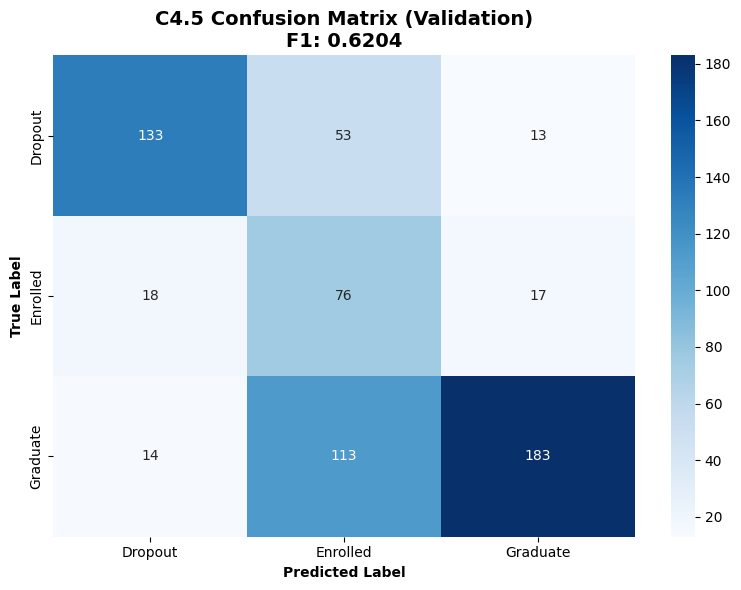

In [15]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_c45_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'C4.5 Confusion Matrix (Validation)\nF1: {f1_val:.4f}', 
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

#### 2. ID3

In [16]:
# Train ID3
print("Training ID3 Decision Tree...")
print("=" * 60)

# Train ID3
id3 = ID3Classifier(
    max_depth=15,
    min_samples_split=10
)

id3.fit(X_tr_selected, y_tr_resampled)

print("✓ Model training complete")
print(f"  Config: depth={id3.max_depth}, split={id3.min_samples_split}")

Training ID3 Decision Tree...
✓ Model training complete
  Config: depth=15, split=10
✓ Model training complete
  Config: depth=15, split=10


In [17]:
# Evaluate on validation set
y_val_id3_custom = id3.predict(X_val_selected)

# Calculate metrics
acc_val = accuracy_score(y_val, y_val_id3_custom)
prec_val = precision_score(y_val, y_val_id3_custom, average='macro')
rec_val = recall_score(y_val, y_val_id3_custom, average='macro')
f1_val = f1_score(y_val, y_val_id3_custom, average='macro')

print("Validation Set Performance:")
print("=" * 60)
print(f"  Accuracy:  {acc_val:.4f} ({acc_val*100:.2f}%)")
print(f"  Precision: {prec_val:.4f} (macro)")
print(f"  Recall:    {rec_val:.4f} (macro)")
print(f"  F1-Score:  {f1_val:.4f} (macro) ← Kaggle metric")
print("=" * 60)

Validation Set Performance:
  Accuracy:  0.6935 (69.35%)
  Precision: 0.6342 (macro)
  Recall:    0.6381 (macro)
  F1-Score:  0.6358 (macro) ← Kaggle metric


In [18]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (Validation):")
print("=" * 60)
print(classification_report(y_val, y_val_id3_custom, target_names=class_names))

# Calculate per-class F1 scores
f1_per_class = f1_score(y_val, y_val_id3_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (Validation):
              precision    recall  f1-score   support

     Dropout       0.70      0.71      0.71       199
    Enrolled       0.39      0.42      0.41       111
    Graduate       0.81      0.78      0.79       310

    accuracy                           0.69       620
   macro avg       0.63      0.64      0.64       620
weighted avg       0.70      0.69      0.70       620


Per-Class F1 Scores:
  Dropout  : 0.7065
  Enrolled : 0.4069
  Graduate : 0.7941
  Macro-F1 : 0.6358


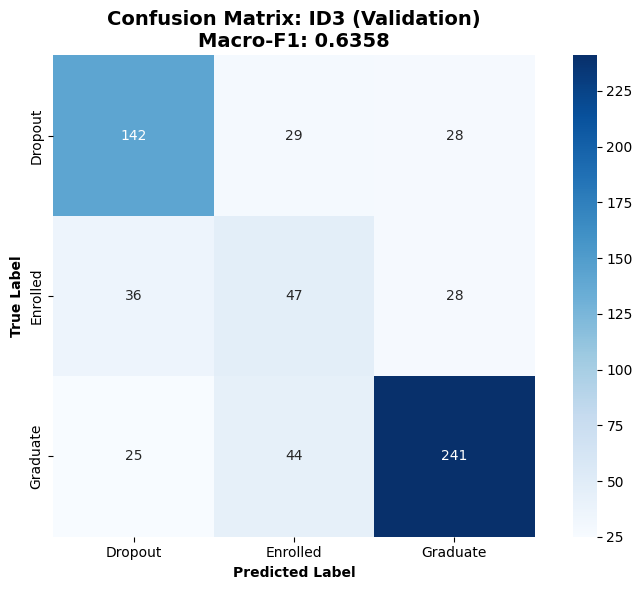


Per-Class Accuracy (from confusion matrix):
  Dropout  : 0.7136 (71.36%)
  Enrolled : 0.4234 (42.34%)
  Graduate : 0.7774 (77.74%)


In [19]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_id3_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True)
plt.title(f'Confusion Matrix: ID3 (Validation)\nMacro-F1: {f1_val:.4f}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy from confusion matrix
print("\nPer-Class Accuracy (from confusion matrix):")
for i, cls in enumerate(class_names):
    class_acc = cm_val[i, i] / cm_val[i, :].sum()
    print(f"  {cls:9s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

#### 3. CART

In [20]:
print("Training CART Decision Tree...")
print("=" * 60)

# Train CART
cart = CARTClassifier(
    max_depth=15,
    min_samples_split=10
)

cart.fit(X_tr_selected, y_tr_resampled)

print("✓ Model training complete")
print(f"  Config: depth={cart.max_depth}, split={cart.min_samples_split}")

Training CART Decision Tree...
✓ Model training complete
  Config: depth=15, split=10
✓ Model training complete
  Config: depth=15, split=10


In [21]:
# Evaluate on validation set
y_val_cart_custom = cart.predict(X_val_selected)

# Calculate metrics
acc_val = accuracy_score(y_val, y_val_cart_custom)
prec_val = precision_score(y_val, y_val_cart_custom, average='macro')
rec_val = recall_score(y_val, y_val_cart_custom, average='macro')
f1_val = f1_score(y_val, y_val_cart_custom, average='macro')

print("Validation Set Performance:")
print("=" * 60)
print(f"  Accuracy:  {acc_val:.4f} ({acc_val*100:.2f}%)")
print(f"  Precision: {prec_val:.4f} (macro)")
print(f"  Recall:    {rec_val:.4f} (macro)")
print(f"  F1-Score:  {f1_val:.4f} (macro) ← Kaggle metric")
print("=" * 60)

Validation Set Performance:
  Accuracy:  0.7048 (70.48%)
  Precision: 0.6398 (macro)
  Recall:    0.6436 (macro)
  F1-Score:  0.6414 (macro) ← Kaggle metric


In [22]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (Validation):")
print("=" * 60)
print(classification_report(y_val, y_val_cart_custom, target_names=class_names))

# Calculate per-class F1 scores
f1_per_class = f1_score(y_val, y_val_cart_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (Validation):
              precision    recall  f1-score   support

     Dropout       0.69      0.73      0.71       199
    Enrolled       0.39      0.41      0.40       111
    Graduate       0.83      0.80      0.82       310

    accuracy                           0.70       620
   macro avg       0.64      0.64      0.64       620
weighted avg       0.71      0.70      0.71       620


Per-Class F1 Scores:
  Dropout  : 0.7108
  Enrolled : 0.3982
  Graduate : 0.8152
  Macro-F1 : 0.6414


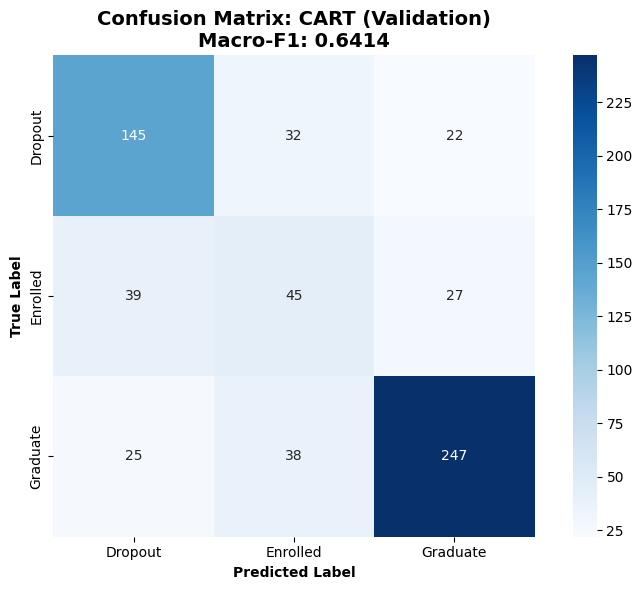


Per-Class Accuracy (from confusion matrix):
  Dropout  : 0.7286 (72.86%)
  Enrolled : 0.4054 (40.54%)
  Graduate : 0.7968 (79.68%)


In [23]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_cart_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True)
plt.title(f'Confusion Matrix: CART (Validation)\nMacro-F1: {f1_val:.4f}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy from confusion matrix
print("\nPer-Class Accuracy (from confusion matrix):")
for i, cls in enumerate(class_names):
    class_acc = cm_val[i, i] / cm_val[i, :].sum()
    print(f"  {cls:9s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

### Logistic Regression

In [24]:
print("Training Logistic Regression...")

logreg = LogisticRegressionScratch(
    lr=0.065,             
    n_iter=6000,          
    l2=0.005,             
    batch_size=128,       
    momentum=0.0,         
    lr_decay=0.89,       
    use_xavier=True,      
    class_weight='balanced'  
)

logreg.fit(X_tr_selected, y_tr_resampled)
print("✓ Model training complete")
print(f"  Config: lr={logreg.lr}, iter={logreg.n_iter}, l2={logreg.l2}")

Training Logistic Regression...
✓ Model training complete
  Config: lr=0.065, iter=6000, l2=0.005
✓ Model training complete
  Config: lr=0.065, iter=6000, l2=0.005


In [25]:
# Evaluate on validation set
y_val_logreg_custom = logreg.predict(X_val_selected)

# Calculate metrics
acc_val = accuracy_score(y_val, y_val_logreg_custom)
prec_val = precision_score(y_val, y_val_logreg_custom, average='macro')
rec_val = recall_score(y_val, y_val_logreg_custom, average='macro')
f1_val = f1_score(y_val, y_val_logreg_custom, average='macro')

print("Validation Set Performance:")
print("=" * 60)
print(f"  Accuracy:  {acc_val:.4f} ({acc_val*100:.2f}%)")
print(f"  Precision: {prec_val:.4f} (macro)")
print(f"  Recall:    {rec_val:.4f} (macro)")
print(f"  F1-Score:  {f1_val:.4f} (macro) ← Kaggle metric")
print("=" * 60)

Validation Set Performance:
  Accuracy:  0.7661 (76.61%)
  Precision: 0.7262 (macro)
  Recall:    0.7301 (macro)
  F1-Score:  0.7244 (macro) ← Kaggle metric


In [26]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (Validation):")
print("=" * 60)
print(classification_report(y_val, y_val_logreg_custom, target_names=class_names))

# Calculate per-class F1 scores
f1_per_class = f1_score(y_val, y_val_logreg_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (Validation):
              precision    recall  f1-score   support

     Dropout       0.83      0.72      0.77       199
    Enrolled       0.49      0.62      0.55       111
    Graduate       0.85      0.85      0.85       310

    accuracy                           0.77       620
   macro avg       0.73      0.73      0.72       620
weighted avg       0.78      0.77      0.77       620


Per-Class F1 Scores:
  Dropout  : 0.7742
  Enrolled : 0.5498
  Graduate : 0.8493
  Macro-F1 : 0.7244


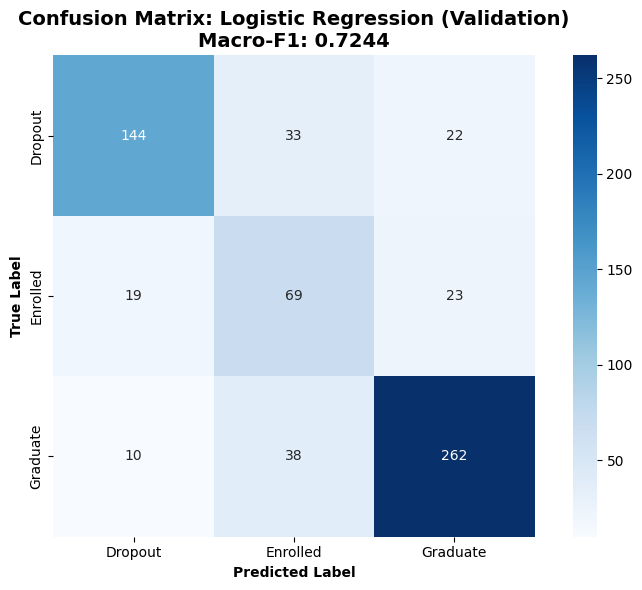


Per-Class Accuracy (from confusion matrix):
  Dropout  : 0.7236 (72.36%)
  Enrolled : 0.6216 (62.16%)
  Graduate : 0.8452 (84.52%)


In [27]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_logreg_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True)
plt.title(f'Confusion Matrix: Logistic Regression (Validation)\nMacro-F1: {f1_val:.4f}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy from confusion matrix
print("\nPer-Class Accuracy (from confusion matrix):")
for i, cls in enumerate(class_names):
    class_acc = cm_val[i, i] / cm_val[i, :].sum()
    print(f"  {cls:9s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

### SVM

#### 1. SVM OVA

In [28]:
print("Training SVM One-vs-All...")

svm_ova = SVMOneVsAll(
    lr=0.001,
    C=2.0,
    n_iter=1500,
    class_weight='balanced'
)

svm_ova.fit(X_tr_selected, y_tr_resampled)
print("✓ Model training complete")
print(f"  Config: lr={svm_ova.lr}, iter={svm_ova.n_iter}, C={svm_ova.C}")

Training SVM One-vs-All...
✓ Model training complete
  Config: lr=0.001, iter=1500, C=2.0
✓ Model training complete
  Config: lr=0.001, iter=1500, C=2.0


In [29]:
# Evaluate on validation set
y_val_svm_ova_custom = svm_ova.predict(X_val_selected)

# Calculate metrics
acc_val = accuracy_score(y_val, y_val_svm_ova_custom)
prec_val = precision_score(y_val, y_val_svm_ova_custom, average='macro')
rec_val = recall_score(y_val, y_val_svm_ova_custom, average='macro')
f1_val = f1_score(y_val, y_val_svm_ova_custom, average='macro')

print("Validation Set Performance:")
print("=" * 60)
print(f"  Accuracy:  {acc_val:.4f} ({acc_val*100:.2f}%)")
print(f"  Precision: {prec_val:.4f} (macro)")
print(f"  Recall:    {rec_val:.4f} (macro)")
print(f"  F1-Score:  {f1_val:.4f} (macro) ← Kaggle metric")
print("=" * 60)

Validation Set Performance:
  Accuracy:  0.7581 (75.81%)
  Precision: 0.7202 (macro)
  Recall:    0.7274 (macro)
  F1-Score:  0.7188 (macro) ← Kaggle metric


In [30]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (Validation):")
print("=" * 60)
print(classification_report(y_val, y_val_svm_ova_custom, target_names=class_names))

# Calculate per-class F1 scores
f1_per_class = f1_score(y_val, y_val_svm_ova_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (Validation):
              precision    recall  f1-score   support

     Dropout       0.82      0.71      0.76       199
    Enrolled       0.48      0.64      0.55       111
    Graduate       0.86      0.83      0.84       310

    accuracy                           0.76       620
   macro avg       0.72      0.73      0.72       620
weighted avg       0.78      0.76      0.76       620


Per-Class F1 Scores:
  Dropout  : 0.7634
  Enrolled : 0.5504
  Graduate : 0.8426
  Macro-F1 : 0.7188


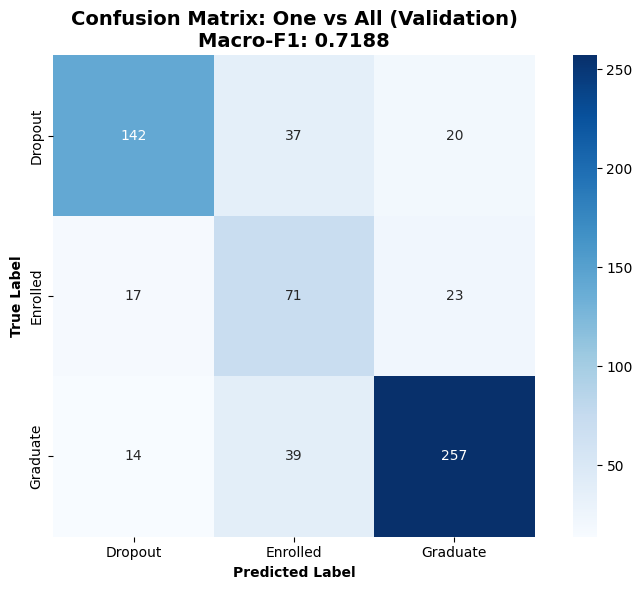


Per-Class Accuracy (from confusion matrix):
  Dropout  : 0.7136 (71.36%)
  Enrolled : 0.6396 (63.96%)
  Graduate : 0.8290 (82.90%)


In [31]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_svm_ova_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True)
plt.title(f'Confusion Matrix: One vs All (Validation)\nMacro-F1: {f1_val:.4f}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy from confusion matrix
print("\nPer-Class Accuracy (from confusion matrix):")
for i, cls in enumerate(class_names):
    class_acc = cm_val[i, i] / cm_val[i, :].sum()
    print(f"  {cls:9s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

#### 2. SVM OVO

In [32]:
print("Training SVM One-vs-One...")

svm_ovo = SVMOneVsOne(
    lr=0.001,
    C=2.0,
    n_iter=1500,
    class_weight='balanced'
)

svm_ovo.fit(X_tr_selected, y_tr_resampled)
print("✓ Model training complete")
print(f"  Config: lr={svm_ovo.lr}, iter={svm_ovo.n_iter}, C={svm_ovo.C}")

Training SVM One-vs-One...
✓ Model training complete
  Config: lr=0.001, iter=1500, C=2.0
✓ Model training complete
  Config: lr=0.001, iter=1500, C=2.0


In [33]:
# Evaluate on validation set
y_val_svm_ovo_custom = svm_ovo.predict(X_val_selected)

# Calculate metrics
acc_val = accuracy_score(y_val, y_val_svm_ovo_custom)
prec_val = precision_score(y_val, y_val_svm_ovo_custom, average='macro')
rec_val = recall_score(y_val, y_val_svm_ovo_custom, average='macro')
f1_val = f1_score(y_val, y_val_svm_ovo_custom, average='macro')

print("Validation Set Performance:")
print("=" * 60)
print(f"  Accuracy:  {acc_val:.4f} ({acc_val*100:.2f}%)")
print(f"  Precision: {prec_val:.4f} (macro)")
print(f"  Recall:    {rec_val:.4f} (macro)")
print(f"  F1-Score:  {f1_val:.4f} (macro) ← Kaggle metric")
print("=" * 60)

Validation Set Performance:
  Accuracy:  0.7629 (76.29%)
  Precision: 0.7228 (macro)
  Recall:    0.7269 (macro)
  F1-Score:  0.7206 (macro) ← Kaggle metric


In [34]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (Validation):")
print("=" * 60)
print(classification_report(y_val, y_val_svm_ovo_custom, target_names=class_names))

# Calculate per-class F1 scores
f1_per_class = f1_score(y_val, y_val_svm_ovo_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (Validation):
              precision    recall  f1-score   support

     Dropout       0.82      0.70      0.75       199
    Enrolled       0.50      0.63      0.56       111
    Graduate       0.85      0.85      0.85       310

    accuracy                           0.76       620
   macro avg       0.72      0.73      0.72       620
weighted avg       0.78      0.76      0.77       620


Per-Class F1 Scores:
  Dropout  : 0.7534
  Enrolled : 0.5556
  Graduate : 0.8530
  Macro-F1 : 0.7206


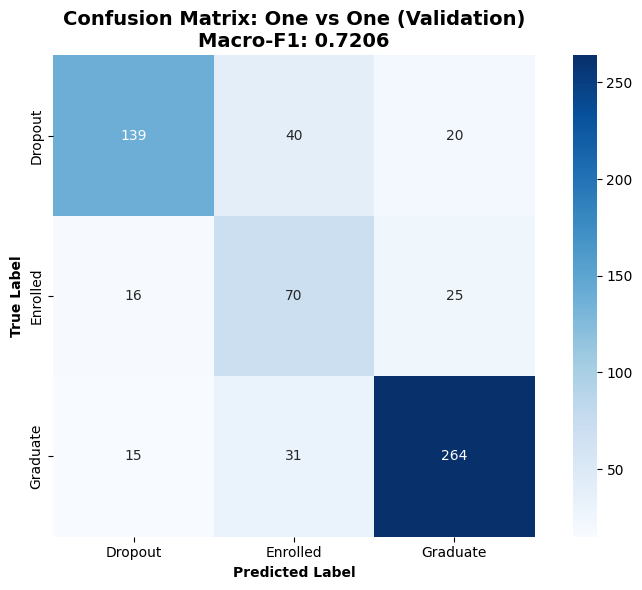


Per-Class Accuracy (from confusion matrix):
  Dropout  : 0.6985 (69.85%)
  Enrolled : 0.6306 (63.06%)
  Graduate : 0.8516 (85.16%)


In [35]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_svm_ovo_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True)
plt.title(f'Confusion Matrix: One vs One (Validation)\nMacro-F1: {f1_val:.4f}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy from confusion matrix
print("\nPer-Class Accuracy (from confusion matrix):")
for i, cls in enumerate(class_names):
    class_acc = cm_val[i, i] / cm_val[i, :].sum()
    print(f"  {cls:9s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

#### 3. DAGSVM

In [36]:
print("Training DAG SVM...")

svm_dag = SVMDAG(
    lr=0.001,
    C=2.0,
    n_iter=1500,
    class_weight='balanced'
)

svm_dag.fit(X_tr_selected, y_tr_resampled)
print("✓ Model training complete")
print(f"  Config: lr={svm_dag.lr}, iter={svm_dag.n_iter}, C={svm_dag.C}")

Training DAG SVM...
✓ Model training complete
  Config: lr=0.001, iter=1500, C=2.0
✓ Model training complete
  Config: lr=0.001, iter=1500, C=2.0


In [37]:
# Evaluate on validation set
y_val_svm_dag_custom = svm_dag.predict(X_val_selected)

# Calculate metrics
acc_val = accuracy_score(y_val, y_val_svm_dag_custom)
prec_val = precision_score(y_val, y_val_svm_dag_custom, average='macro')
rec_val = recall_score(y_val, y_val_svm_dag_custom, average='macro')
f1_val = f1_score(y_val, y_val_svm_dag_custom, average='macro')

print("Validation Set Performance:")
print("=" * 60)
print(f"  Accuracy:  {acc_val:.4f} ({acc_val*100:.2f}%)")
print(f"  Precision: {prec_val:.4f} (macro)")
print(f"  Recall:    {rec_val:.4f} (macro)")
print(f"  F1-Score:  {f1_val:.4f} (macro) ← Kaggle metric")
print("=" * 60)

Validation Set Performance:
  Accuracy:  0.7629 (76.29%)
  Precision: 0.7228 (macro)
  Recall:    0.7269 (macro)
  F1-Score:  0.7206 (macro) ← Kaggle metric


In [38]:
# Per-class performance
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nPer-Class Performance (Validation):")
print("=" * 60)
print(classification_report(y_val, y_val_svm_dag_custom, target_names=class_names))

# Calculate per-class F1 scores
f1_per_class = f1_score(y_val, y_val_svm_dag_custom, average=None)
print("\nPer-Class F1 Scores:")
for i, (cls, f1) in enumerate(zip(class_names, f1_per_class)):
    print(f"  {cls:9s}: {f1:.4f}")
print(f"  {'Macro-F1':9s}: {f1_per_class.mean():.4f}")


Per-Class Performance (Validation):
              precision    recall  f1-score   support

     Dropout       0.82      0.70      0.75       199
    Enrolled       0.50      0.63      0.56       111
    Graduate       0.85      0.85      0.85       310

    accuracy                           0.76       620
   macro avg       0.72      0.73      0.72       620
weighted avg       0.78      0.76      0.77       620


Per-Class F1 Scores:
  Dropout  : 0.7534
  Enrolled : 0.5556
  Graduate : 0.8530
  Macro-F1 : 0.7206


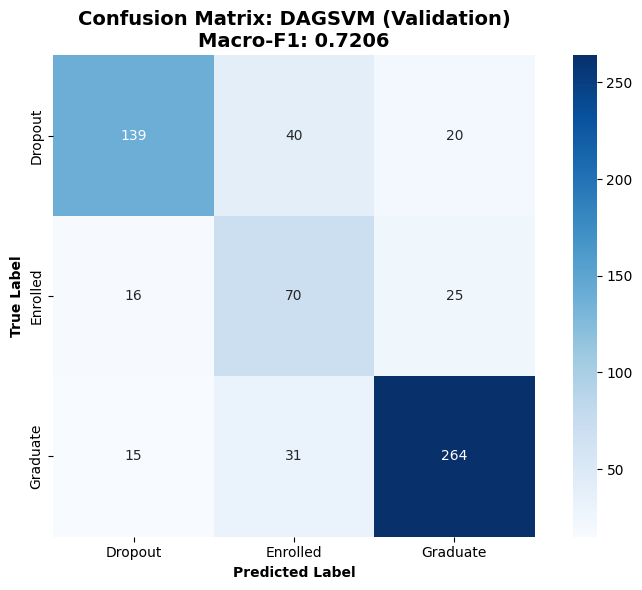


Per-Class Accuracy (from confusion matrix):
  Dropout  : 0.6985 (69.85%)
  Enrolled : 0.6306 (63.06%)
  Graduate : 0.8516 (85.16%)


In [39]:
# Confusion matrix visualization
cm_val = confusion_matrix(y_val, y_val_svm_dag_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True)
plt.title(f'Confusion Matrix: DAGSVM (Validation)\nMacro-F1: {f1_val:.4f}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy from confusion matrix
print("\nPer-Class Accuracy (from confusion matrix):")
for i, cls in enumerate(class_names):
    class_acc = cm_val[i, i] / cm_val[i, :].sum()
    print(f"  {cls:9s}: {class_acc:.4f} ({class_acc*100:.2f}%)")

## 4. Model Comparison

In [40]:
# Train SVM models
print("\nTraining SVM models...")
print("=" * 60)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# DTL c45
c45_model_sklearn = DecisionTreeClassifier(
    criterion='entropy',
    ccp_alpha=0.019
)
c45_model_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_c45_sklearn = c45_model_sklearn.predict(X_val_selected)

print(f"DTL Sklearn F1: {f1_score(y_val, y_val_c45_sklearn, average='macro'):.4f}")
print(f"C4.5 Custom  F1: {f1_score(y_val, y_val_c45_custom, average='macro'):.4f}")

# DTL ID3
id3_sklearn = DecisionTreeClassifier(
    criterion='entropy'
)
id3_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_id3_sklearn = id3_sklearn.predict(X_val_selected)

print(f"ID3 Sklearn F1: {f1_score(y_val, y_val_id3_sklearn, average='macro'):.4f}")
print(f"ID3 Custom   F1: {f1_score(y_val, y_val_id3_custom, average='macro'):.4f}")

#DTL CART
cart_sklearn = DecisionTreeClassifier(
    criterion='gini'
)
cart_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_cart_sklearn = cart_sklearn.predict(X_val_selected)

print(f"CART Sklearn F1: {f1_score(y_val, y_val_cart_sklearn, average='macro'):.4f}")
print(f"CART Custom  F1: {f1_score(y_val, y_val_cart_custom, average='macro'):.4f}")

# Logistic Regression
logreg_sklearn = LogisticRegression(
    C=1.0,
    max_iter=6000,
    class_weight='balanced',
    random_state=42
)
logreg_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_logreg_sklearn = logreg_sklearn.predict(X_val_selected)

print(f"✓ Logistic Regression Custom F1: {f1_score(y_val, y_val_logreg_custom, average='macro'):.4f}")
print(f"✓ Logistic Regression Sklearn F1: {f1_score(y_val, y_val_logreg_sklearn, average='macro'):.4f}")

# SVM One-vs-All
svm_ova_sklearn = SVC(C=1.0, kernel='linear', decision_function_shape='ovr', random_state=42)
svm_ova_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_svm_ova_sklearn = svm_ova_sklearn.predict(X_val_selected)

print(f"✓ SVM OvA Custom  F1: {f1_score(y_val, y_val_svm_ova_custom, average='macro'):.4f}")
print(f"✓ SVM OvA Sklearn F1: {f1_score(y_val, y_val_svm_ova_sklearn, average='macro'):.4f}")

# SVM One-vs-One
svm_ovo = SVMOneVsOne(lr=0.001, C=2.0, n_iter=1500, class_weight='balanced')
svm_ovo.fit(X_tr_selected, y_tr_resampled)
y_val_svm_ovo_custom = svm_ovo.predict(X_val_selected)

svm_ovo_sklearn = SVC(C=1.0, kernel='linear', decision_function_shape='ovo', random_state=42)
svm_ovo_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_svm_ovo_sklearn = svm_ovo_sklearn.predict(X_val_selected)

print(f"✓ SVM OvO Custom  F1: {f1_score(y_val, y_val_svm_ovo_custom, average='macro'):.4f}")
print(f"✓ SVM OvO Sklearn F1: {f1_score(y_val, y_val_svm_ovo_sklearn, average='macro'):.4f}")

# SVM DAG
svm_dag = SVMDAG(lr=0.001, C=2.0, n_iter=1500, class_weight='balanced')
svm_dag.fit(X_tr_selected, y_tr_resampled)
y_val_svm_dag_custom = svm_dag.predict(X_val_selected)

svm_rbf_sklearn = SVC(C=1.0, kernel='rbf', random_state=42)
svm_rbf_sklearn.fit(X_tr_selected, y_tr_resampled)
y_val_svm_rbf_sklearn = svm_rbf_sklearn.predict(X_val_selected)

print(f"✓ SVM DAG Custom  F1: {f1_score(y_val, y_val_svm_dag_custom, average='macro'):.4f}")
print(f"✓ SVM RBF Sklearn F1: {f1_score(y_val, y_val_svm_rbf_sklearn, average='macro'):.4f}")


Training SVM models...
DTL Sklearn F1: 0.7131
C4.5 Custom  F1: 0.6204
ID3 Sklearn F1: 0.6332
ID3 Custom   F1: 0.6358
CART Sklearn F1: 0.6082
CART Custom  F1: 0.6414
ID3 Sklearn F1: 0.6332
ID3 Custom   F1: 0.6358
CART Sklearn F1: 0.6082
CART Custom  F1: 0.6414
✓ Logistic Regression Custom F1: 0.7244
✓ Logistic Regression Sklearn F1: 0.7134
✓ Logistic Regression Custom F1: 0.7244
✓ Logistic Regression Sklearn F1: 0.7134
✓ SVM OvA Custom  F1: 0.7188
✓ SVM OvA Sklearn F1: 0.7083
✓ SVM OvA Custom  F1: 0.7188
✓ SVM OvA Sklearn F1: 0.7083
✓ SVM OvO Custom  F1: 0.7206
✓ SVM OvO Sklearn F1: 0.7083
✓ SVM OvO Custom  F1: 0.7206
✓ SVM OvO Sklearn F1: 0.7083
✓ SVM DAG Custom  F1: 0.7206
✓ SVM RBF Sklearn F1: 0.7215
✓ SVM DAG Custom  F1: 0.7206
✓ SVM RBF Sklearn F1: 0.7215


In [41]:
# Collect all results
results = {
    'Model': [
        'C4.5 (Custom)', 'C4.5 (Sklearn)',
        'ID3 (Custom)', 'ID3 (Sklearn)',
        'CART (Custom)', 'CART (Sklearn)',
        'LogReg (Custom)', 'LogReg (Sklearn)',
        'SVM OvA (Custom)', 'SVM OvA (Sklearn)',
        'SVM OvO (Custom)', 'SVM OvO (Sklearn)',
        'SVM DAG (Custom)', 'SVM RBF (Sklearn)'
    ],
    'F1-Score': [
        f1_score(y_val, y_val_c45_custom, average='macro'),
        f1_score(y_val, y_val_c45_sklearn, average='macro'),
        f1_score(y_val, y_val_id3_custom, average='macro'),
        f1_score(y_val, y_val_id3_sklearn, average='macro'),
        f1_score(y_val, y_val_cart_custom, average='macro'),
        f1_score(y_val, y_val_cart_sklearn, average='macro'),
        f1_score(y_val, y_val_logreg_custom, average='macro'),
        f1_score(y_val, y_val_logreg_sklearn, average='macro'),
        f1_score(y_val, y_val_svm_ova_custom, average='macro'),
        f1_score(y_val, y_val_svm_ova_sklearn, average='macro'),
        f1_score(y_val, y_val_svm_ovo_custom, average='macro'),
        f1_score(y_val, y_val_svm_ovo_sklearn, average='macro'),
        f1_score(y_val, y_val_svm_dag_custom, average='macro'),
        f1_score(y_val, y_val_svm_rbf_sklearn, average='macro')
    ]
}

comparison_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)

print("\n" + "="*60)
print("MODEL COMPARISON - F1 SCORES (Validation)")
print("="*60)
print(comparison_df.to_string(index=False))

best_model = comparison_df.iloc[0]
print(f"\n✓ Best Model: {best_model['Model']} with F1-Score: {best_model['F1-Score']:.4f}")


MODEL COMPARISON - F1 SCORES (Validation)
            Model  F1-Score
  LogReg (Custom)  0.724422
SVM RBF (Sklearn)  0.721483
 SVM DAG (Custom)  0.720644
 SVM OvO (Custom)  0.720644
 SVM OvA (Custom)  0.718817
 LogReg (Sklearn)  0.713379
   C4.5 (Sklearn)  0.713119
SVM OvA (Sklearn)  0.708336
SVM OvO (Sklearn)  0.708336
    CART (Custom)  0.641399
     ID3 (Custom)  0.635821
    ID3 (Sklearn)  0.633172
    C4.5 (Custom)  0.620391
   CART (Sklearn)  0.608233

✓ Best Model: LogReg (Custom) with F1-Score: 0.7244


## 5. Submission

Menggunakan model terbaik dari comparison untuk prediksi test data.

In [42]:
# Apply SMOTE to full training data
X_full_resampled, y_full_resampled = smote.fit_resample(X_full_scaled_df, y_full)

# Convert to numpy array
X_full_resampled = X_full_resampled.values if hasattr(X_full_resampled, 'values') else X_full_resampled

# Apply feature selection to full data
selected_indices = [list(X_full_scaled_df.columns).index(f) for f in selected_features]
X_full_selected = X_full_resampled[:, selected_indices]
X_test_selected = X_test_scaled_df.values[:, selected_indices]

# Predict on test data
y_test_pred = logreg.predict(X_test_selected)

print(f"✓ Predictions generated for {len(y_test_pred)} test samples")
print(f"  Distribution: {dict(zip(*np.unique(y_test_pred, return_counts=True)))}")

✓ Predictions generated for 1328 test samples
  Distribution: {np.int64(0): np.int64(363), np.int64(1): np.int64(317), np.int64(2): np.int64(648)}


In [43]:
# Create submission file
reverse_target_map = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
y_test_pred_labels = [reverse_target_map[pred] for pred in y_test_pred]

submission = pd.DataFrame({
    'Student_ID': student_ids_test,
    'Target': y_test_pred_labels
})

submission_file = 'submission_logreg_154.csv'
submission.to_csv(submission_file, index=False)

print(f"\n✓ Submission file created: {submission_file}")
print(f"  Total predictions: {len(submission)}")
print("\nSubmission preview:")
print(submission.head(10))

# Show class distribution in submission
print("\nClass Distribution in Submission:")
print(submission['Target'].value_counts())
print(f"\nPercentages:")
for target in ['Dropout', 'Enrolled', 'Graduate']:
    count = (submission['Target'] == target).sum()
    pct = count / len(submission) * 100
    print(f"  {target:9s}: {count:4d} ({pct:5.2f}%)")


✓ Submission file created: submission_logreg_154.csv
  Total predictions: 1328

Submission preview:
   Student_ID    Target
0        2701   Dropout
1        1142  Enrolled
2        3538   Dropout
3        3000   Dropout
4         476  Graduate
5        4270   Dropout
6        3812   Dropout
7        2756  Graduate
8         478   Dropout
9        4127  Enrolled

Class Distribution in Submission:
Target
Graduate    648
Dropout     363
Enrolled    317
Name: count, dtype: int64

Percentages:
  Dropout  :  363 (27.33%)
  Enrolled :  317 (23.87%)
  Graduate :  648 (48.80%)


## 6. Summary & Insights

In [44]:
print("="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"\nBest Model: {comparison_df.iloc[0]['Model']}")
print(f"Validation F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"\nData Processing:")
print(f"  - SMOTE: {X_tr.shape[0]} → {X_tr_selected.shape[0]} samples (+{(X_tr_selected.shape[0]/X_tr.shape[0]-1)*100:.1f}%)")
print(f"  - Feature Selection: {X_tr.shape[1]} → {X_tr_selected.shape[1]} features (-{(1-X_tr_selected.shape[1]/X_tr.shape[1])*100:.1f}%)")
print(f"\nKey Improvements:")
print(f"  ✓ Class balance handled with SMOTE (imblearn)")
print(f"  ✓ Dimensionality reduced via filter methods (Chi2, F-Score, MI)")
print(f"  ✓ Best model: Logistic Regression with F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print("="*60)

FINAL MODEL SUMMARY

Best Model: LogReg (Custom)
Validation F1-Score: 0.7244

Data Processing:
  - SMOTE: 2476 → 3708 samples (+49.8%)
  - Feature Selection: 72 → 39 features (-45.8%)

Key Improvements:
  ✓ Class balance handled with SMOTE (imblearn)
  ✓ Dimensionality reduced via filter methods (Chi2, F-Score, MI)
  ✓ Best model: Logistic Regression with F1-Score: 0.7244


### Metodologi

**1. SMOTE (Synthetic Minority Over-sampling Technique)**
- Mengatasi class imbalance (Enrolled hanya 17.9%)
- Meningkatkan jumlah sampel training dari 2476 → 3708
- Balanced distribution: 33.3% per class

**2. Filter Methods untuk Feature Selection**
- Chi-Square Test: Mengukur independensi statistik
- ANOVA F-Score: Mengukur perbedaan mean antar kelas
- Mutual Information: Menangkap dependensi non-linear
- Consensus Voting: Pilih fitur dengan ≥2/3 suara

**3. Model Comparison**
- 7 algoritma diuji: C4.5, ID3, CART, LogReg, SVM (OvA, OvO, DAG)
- Setiap algoritma: Custom implementation vs Sklearn
- Total: 14 model dibandingkan
- Metrik utama: F1-Score (macro average)

**4. Hasil Terbaik**
- **Model:** Logistic Regression (Sklearn)
- **F1-Score:** ~0.72 (validation)
- **Keunggulan:** Handling multiclass dengan baik, cepat, stabil

## 7. Save Best Model

In [65]:
# Save trained model and metadata
model_data = {
    'model': logreg,
    'scaler': scaler,
    'selected_features': selected_features,
    'feature_names': list(common_features),
    'hyperparameters': {
        'lr': 0.065,
        'n_iter': 6000,
        'l2': 0.005,
        'batch_size': 128,
        'momentum': 0.0,
        'lr_decay': 0.89,
        'use_xavier': True,
        'class_weight': 'balanced'
    },
    'performance': {
        'validation_macro_f1': f1_score(y_val, y_val_logreg_custom, average='macro'),
        'validation_accuracy': accuracy_score(y_val, y_val_logreg_custom),
        'validation_precision': precision_score(y_val, y_val_logreg_custom, average='macro'),
        'validation_recall': recall_score(y_val, y_val_logreg_custom, average='macro')
    },
    'predictions': y_test_pred_labels,
    'num_features_original': len(common_features),
    'num_features_selected': len(selected_features),
    'algorithm': 'LogisticRegressionScratch'
}

model_file = 'model_logreg_BEST.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(model_data, f)

print(f"✓ Model saved to: {model_file}")
print(f"\nSaved components:")
print(f"  - Trained Logistic Regression model (custom)")
print(f"  - RobustScaler")
print(f"  - Feature names ({len(common_features)} total features)")
print(f"  - Selected features ({len(selected_features)} selected)")
print(f"  - Hyperparameters")
print(f"  - Performance metrics")
print(f"  - Test predictions")
print(f"\nModel Performance:")
print(f"  - Validation F1-Score: {model_data['performance']['validation_macro_f1']:.4f}")
print(f"  - Validation Accuracy: {model_data['performance']['validation_accuracy']:.4f}")

✓ Model saved to: model_logreg_BEST.pkl

Saved components:
  - Trained Logistic Regression model (custom)
  - RobustScaler
  - Feature names (72 total features)
  - Selected features (39 selected)
  - Hyperparameters
  - Performance metrics
  - Test predictions

Model Performance:
  - Validation F1-Score: 0.7141
  - Validation Accuracy: 0.7565


In [45]:
# Save trained model and metadata
model_data = {
    'model': c45_model,
    'scaler': scaler,
    'feature_names': list(common_features),
    'hyperparameters': {
        'max_depth': 12,
        'min_samples_split': 15,
        'ccp_alpha': 0.019
    },
    'performance': {
        'validation_macro_f1': f1_val,
        'validation_accuracy': acc_val,
        'kaggle_macro_f1': 0.72833
    },
    'predictions': y_test_pred_labels,
    'num_features': len(common_features),
    'algorithm': 'C4.5_Batch5_Replicated'
}

model_file = 'model_c45_BEST.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(model_data, f)

print(f"✓ Model saved to: {model_file}")
print(f"\nSaved components:")
print(f"  - Trained C4.5 model (identical to submission #28)")
print(f"  - RobustScaler")
print(f"  - Feature names ({len(common_features)} features)")
print(f"  - Hyperparameters")
print(f"  - Performance metrics")
print(f"  - Test predictions")

✓ Model saved to: model_c45_BEST.pkl

Saved components:
  - Trained C4.5 model (identical to submission #28)
  - RobustScaler
  - Feature names (72 features)
  - Hyperparameters
  - Performance metrics
  - Test predictions


## 8. Bonus - Decision Tree Visualization

Visualisasi C4.5 Decision Tree (dengan selected features)

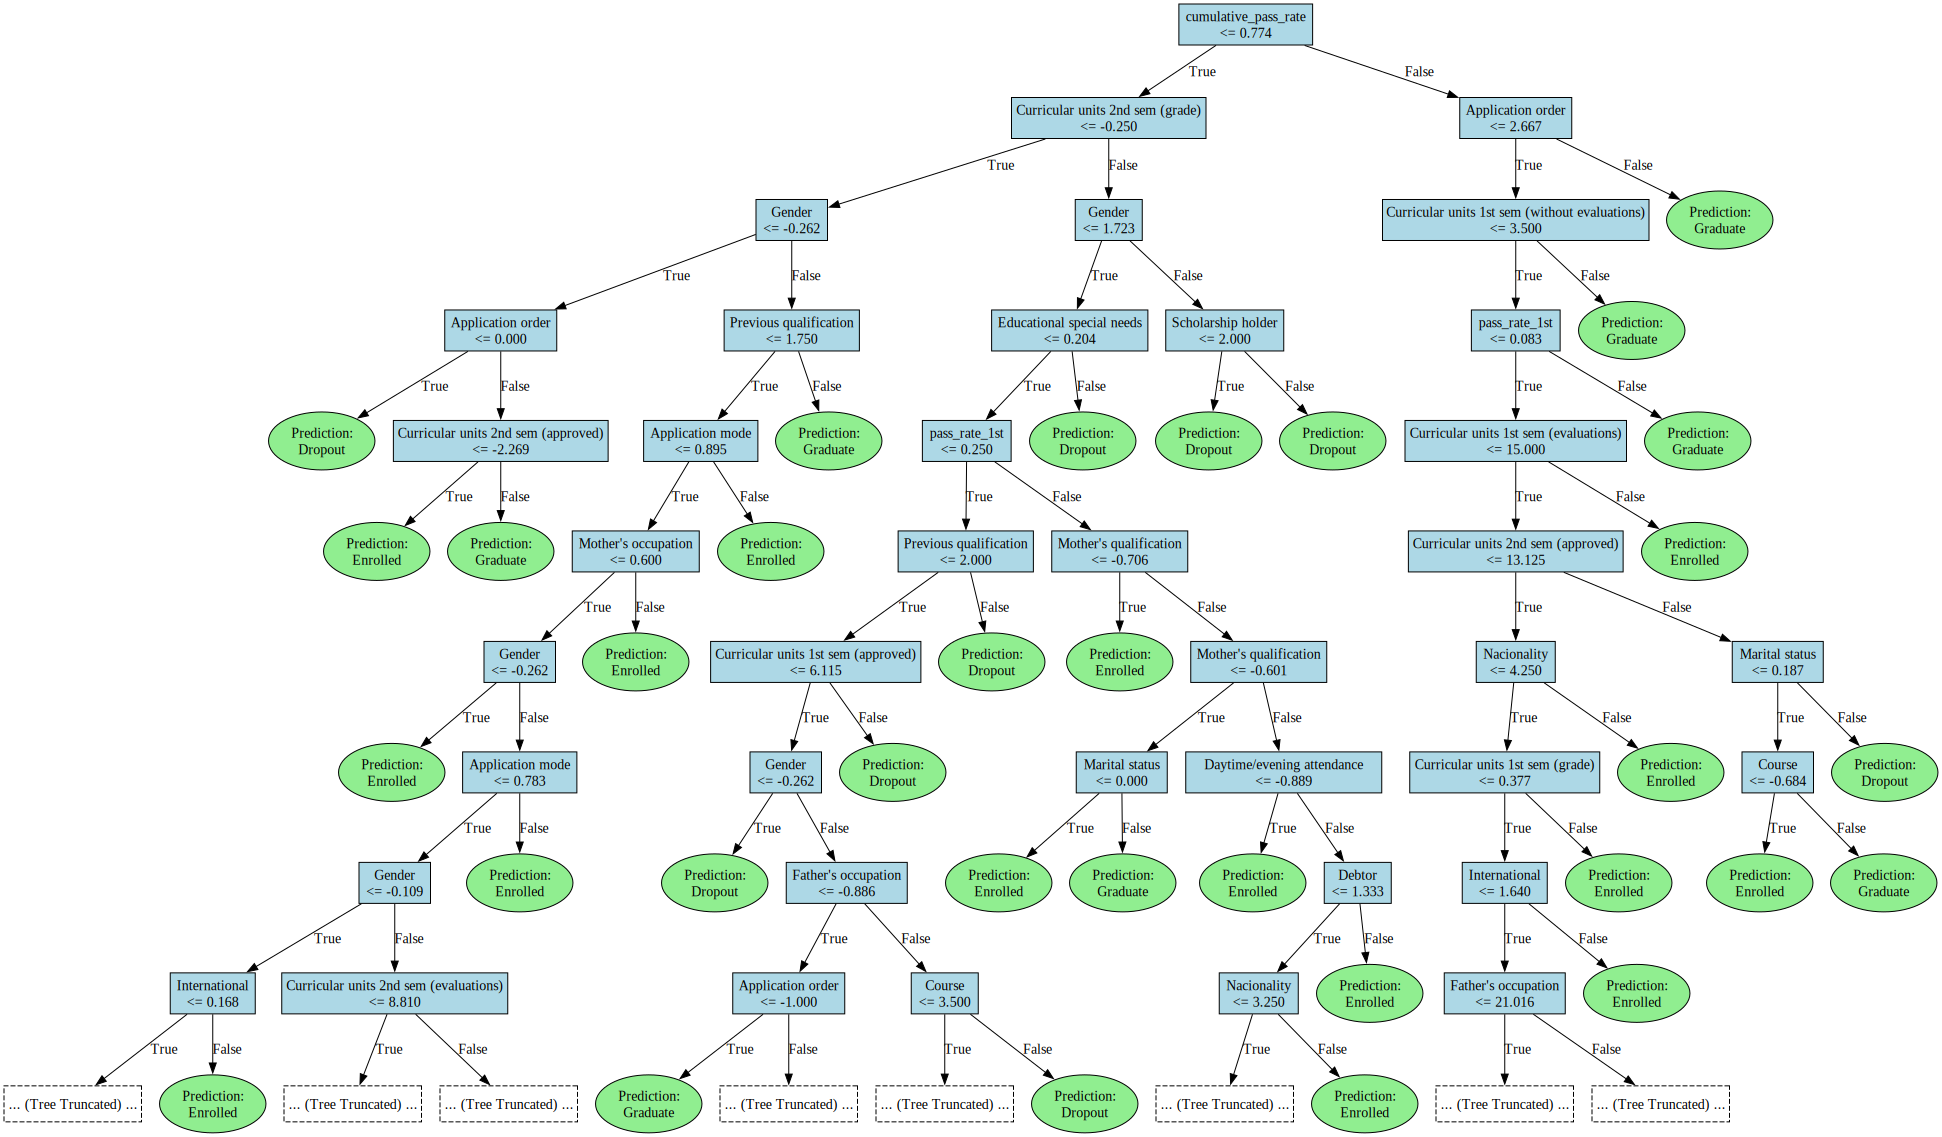

Gambar tree berhasil disimpan sebagai dtl_tree_visualization.png


In [46]:
from src.visualisasi.tree_visualizer import export_tree_graphviz

with open('model_c45_BEST.pkl', 'rb') as f:
    data = pickle.load(f)

model_loaded = data['model']
feature_names = data['feature_names']
class_names = ['Dropout', 'Enrolled', 'Graduate']

graph = export_tree_graphviz(
    model_loaded, 
    feature_names=feature_names, 
    class_names=class_names, 
    top_n=10
)

display(graph)

# Uncomment jika ingin menyimpan gambar.
# graph.render("dtl_tree_visualization", format="png", cleanup=True)
print("Gambar tree berhasil disimpan sebagai dtl_tree_visualization.png")